In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [3]:
with open("dh_depth_selected.pkl", "rb") as f:
    dh_depth_selected = pickle.load(f)

with open("dh_index_selected.pkl", "rb") as f:
    dh_index_selected = pickle.load(f)

with open("dh_index_test_data.pkl", "rb") as f:
    dh_index_test_data, index_test_labels = pickle.load(f)

with open("dh_depth_test_data.pkl", "rb") as f:
    dh_depth_test_data, depth_test_labels = pickle.load(f)

In [4]:
dh_depth_selected[0]

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.137690,-0.078465,0.186381,-0.201752,0.041615,-0.387923,0.002144,1.162582,0.243914,-0.070671,...,-0.229807,0.939916,1.225405,1.053765,-0.233992,0.793017,-0.309119,1.574266,0.169073,3.0
1,0.008568,-0.150186,0.114886,-0.151740,0.103461,-0.364876,-0.031135,1.089812,0.249616,0.033901,...,-0.193089,0.979064,0.966559,1.110969,-0.237902,0.865215,-0.195343,1.570620,0.096090,1.0
2,-0.002273,-0.162505,0.118963,-0.178150,0.149429,-0.312110,0.011304,1.085662,0.261825,-0.019182,...,-0.163337,0.999458,0.892755,1.119645,-0.247313,0.884609,-0.170345,1.596198,0.156313,1.0
3,0.038970,-0.164135,0.177256,-0.164114,0.093655,-0.356177,-0.015165,1.032407,0.319573,-0.000728,...,-0.178091,0.926149,0.889109,1.106459,-0.282326,0.886158,-0.165715,1.526960,0.141400,1.0
4,-0.063199,-0.107796,0.127243,-0.118656,0.072772,-0.139494,-0.138781,1.008334,0.200484,0.023666,...,-0.173123,0.891810,1.174152,0.986235,-0.174853,0.778070,-0.187465,1.755760,0.122308,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.032447,-0.187464,0.120766,-0.156202,0.071068,-0.372380,0.002551,0.982797,0.296936,0.032693,...,-0.149966,0.983054,0.837970,1.137091,-0.304229,0.881550,-0.188720,1.505093,0.084398,1.0
58,-0.063438,-0.169706,0.158281,-0.182230,0.020617,-0.357365,-0.032021,1.061817,0.200825,0.032410,...,-0.178017,0.965649,1.073680,1.103848,-0.228664,0.965474,-0.211065,1.523973,0.142477,4.0
59,0.069700,-0.222153,0.148519,-0.164095,0.150128,-0.398137,0.027588,0.938852,0.327147,0.070927,...,-0.123521,1.000935,0.785683,1.160048,-0.226860,0.964216,-0.158020,1.537051,0.158203,1.0
60,0.319427,-0.246503,0.179870,-0.034587,0.128022,-0.243514,0.162877,0.642433,0.365787,0.069690,...,-0.061150,1.112774,0.298251,0.985816,-0.269109,1.030857,-0.184428,1.467324,0.030064,8.0


{np.float64(0.8538461538461538)}
62


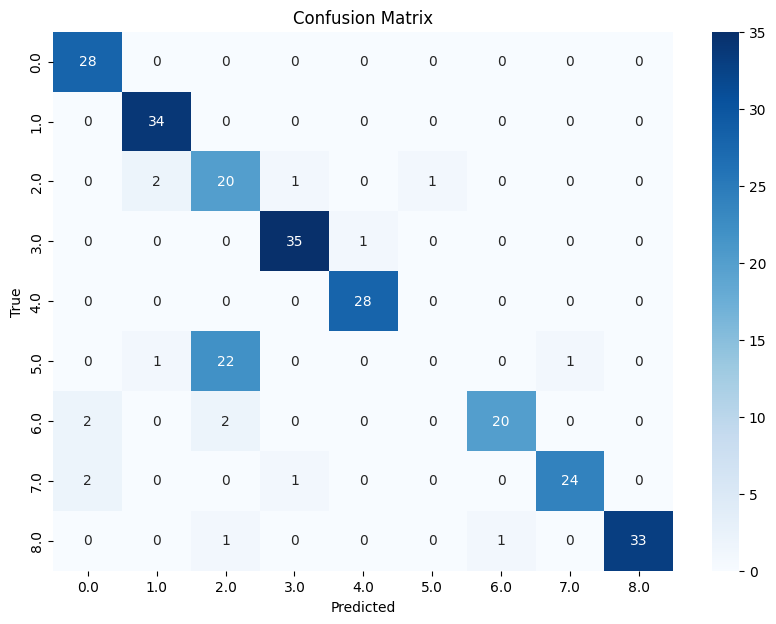

{np.float64(0.8692307692307693)}
60


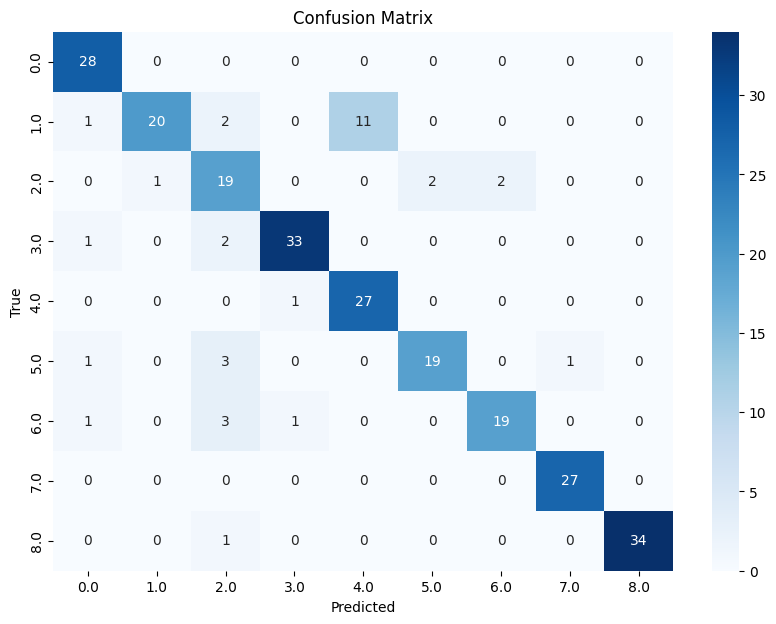

{np.float64(0.8923076923076924)}
84


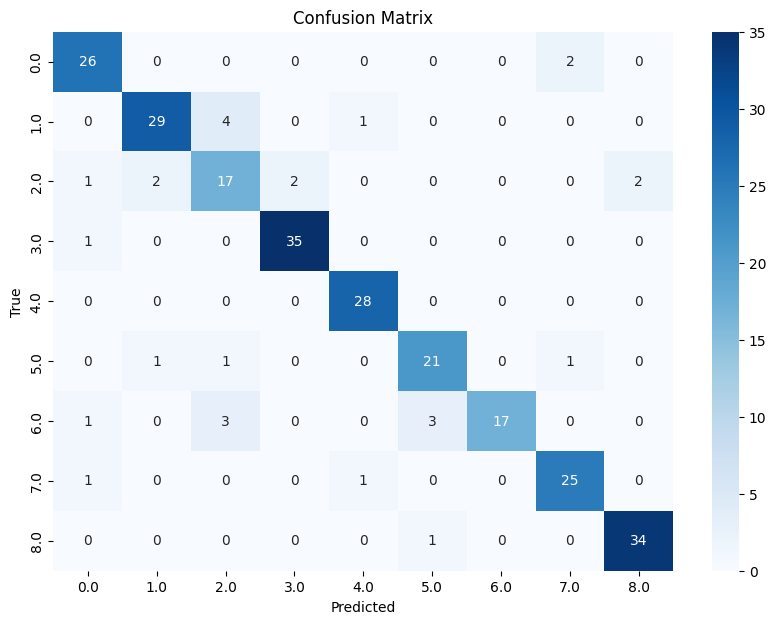

{np.float64(0.8346153846153846)}
52


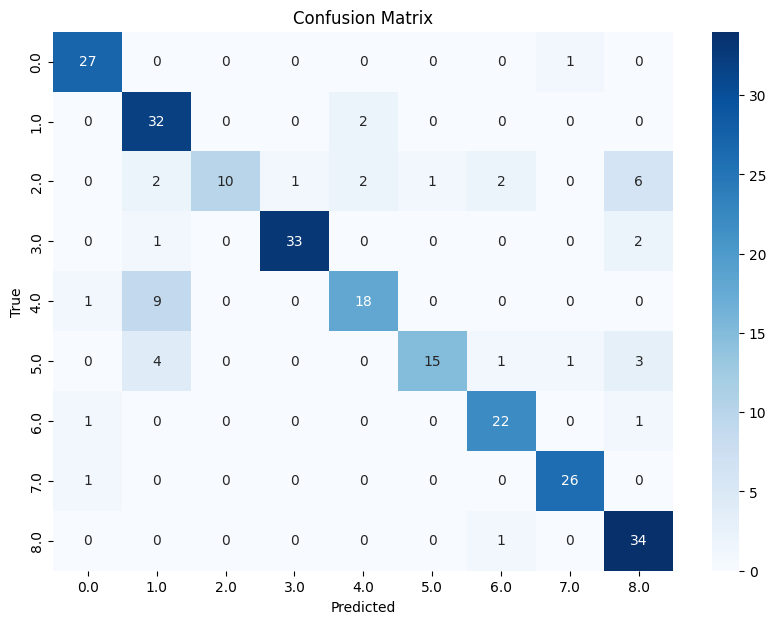

{np.float64(0.8576923076923076)}
80


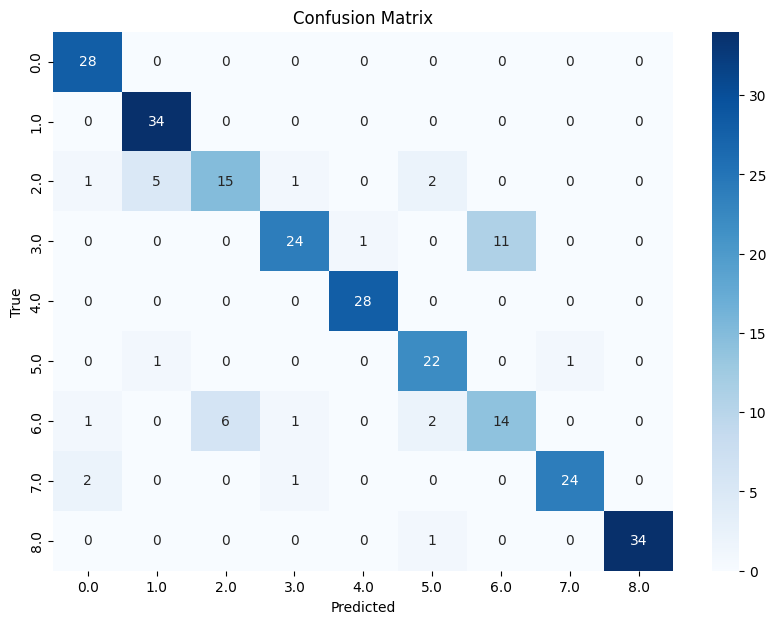

{np.float64(0.926923076923077)}
85


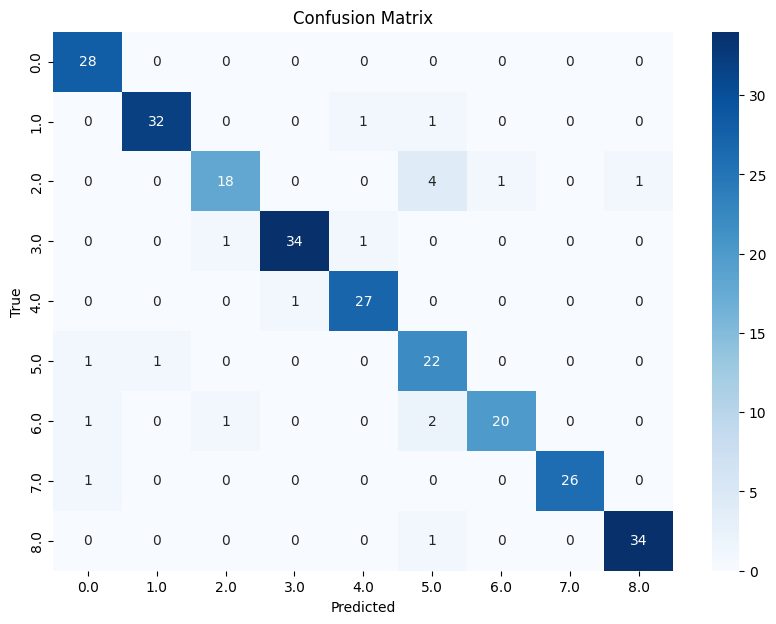

{np.float64(0.9538461538461539)}
94


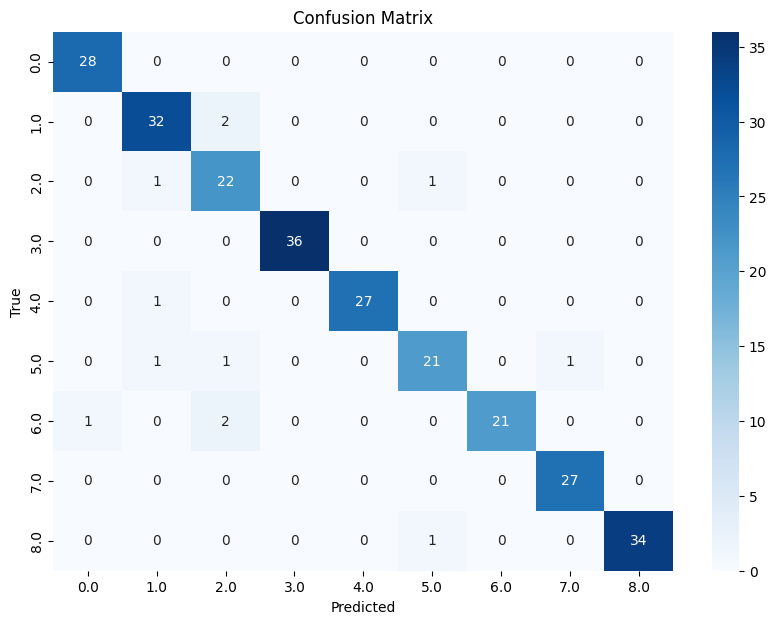

{np.float64(0.9076923076923077)}
60


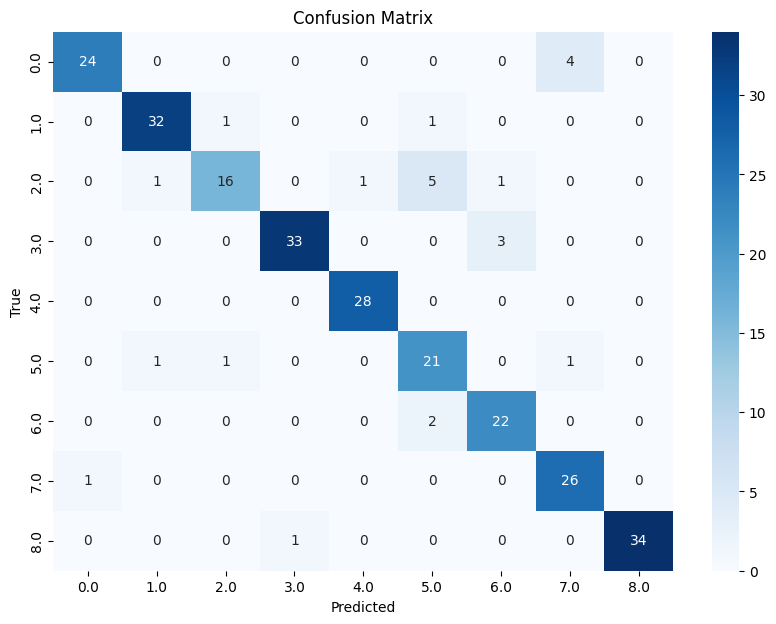

{np.float64(0.8153846153846154)}
50


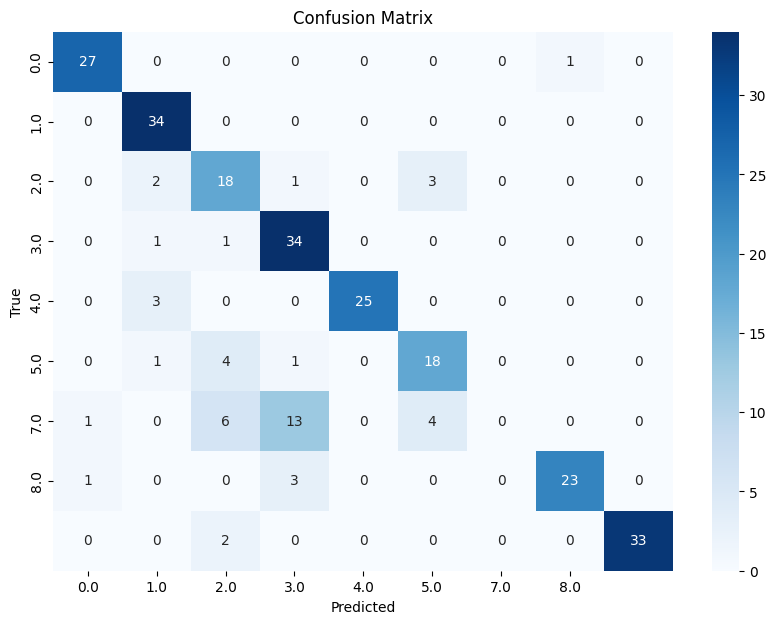

{np.float64(0.8730769230769231)}
64


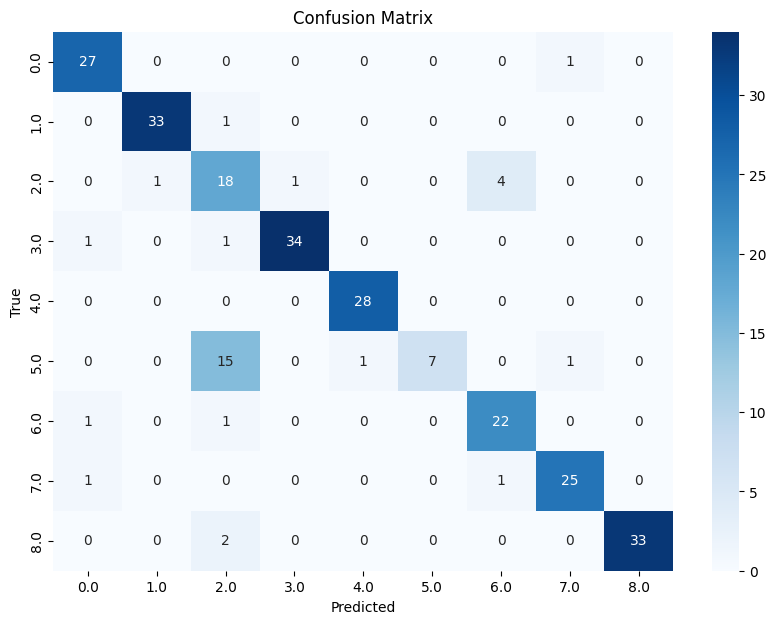

In [5]:
#dh_depth_selected is a list of selected dataframes
#for each one, train a random forest classifier and test on the test data
accs_depth = []
nums_depth = []
for s in dh_depth_selected:
    X_train = s.iloc[:, :-1]
    y_train = s.iloc[:, -1]
    #train a random forest classifier
    rf = RandomForestClassifier(n_estimators=20, max_depth=7, random_state=42)
    rf.fit(X_train, y_train)
    #test on the test data
    y_pred = rf.predict(dh_depth_test_data[:, :-1])
    #print the accuracy
    print({np.mean(y_pred == depth_test_labels)})
    print(len(s))
    accs_depth.append(np.mean(y_pred == depth_test_labels))
    nums_depth.append(len(s))

    #plot confusion matrix
    cm = confusion_matrix(depth_test_labels, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

{np.float64(0.9230769230769231)}
130


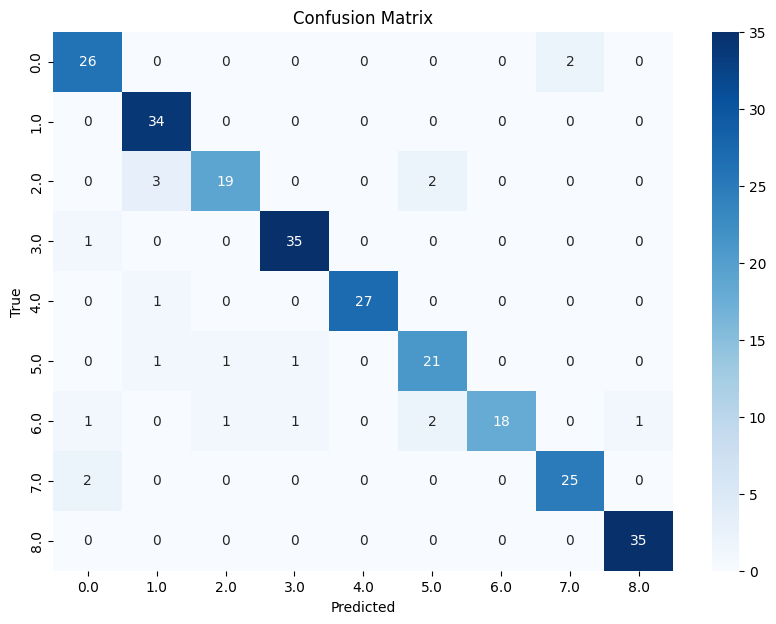

{np.float64(0.9153846153846154)}
80


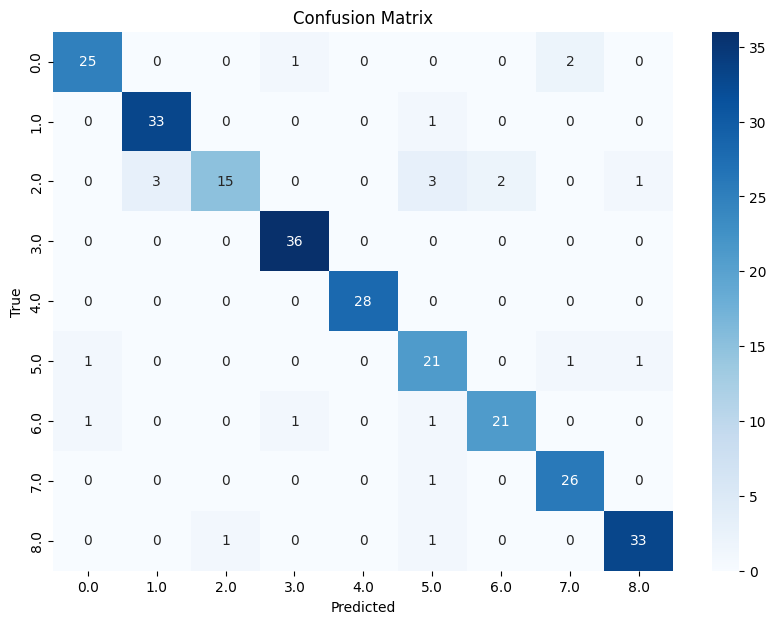

{np.float64(0.8884615384615384)}
60


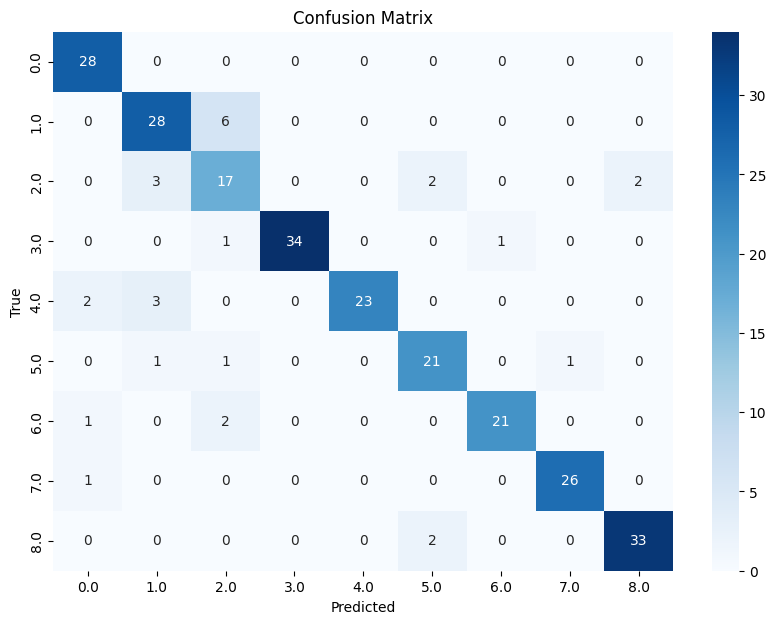

{np.float64(0.9307692307692308)}
100


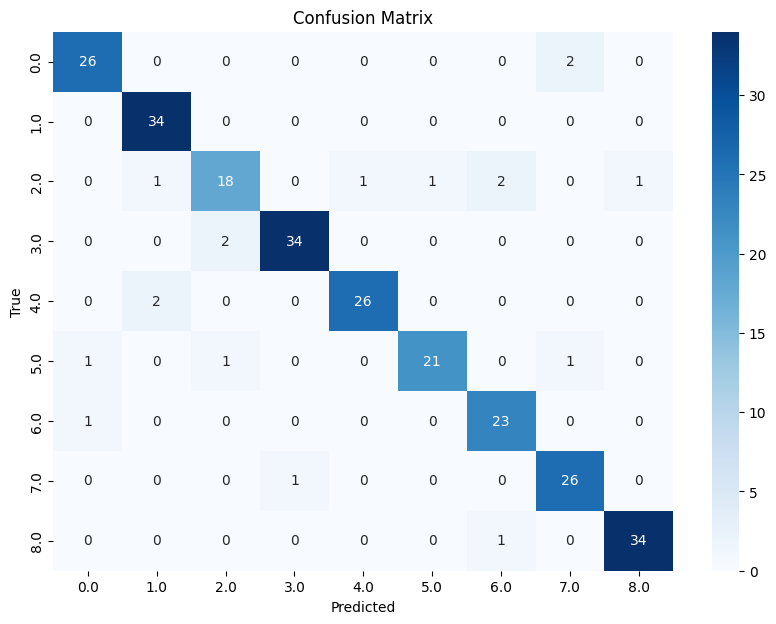

{np.float64(0.8192307692307692)}
60


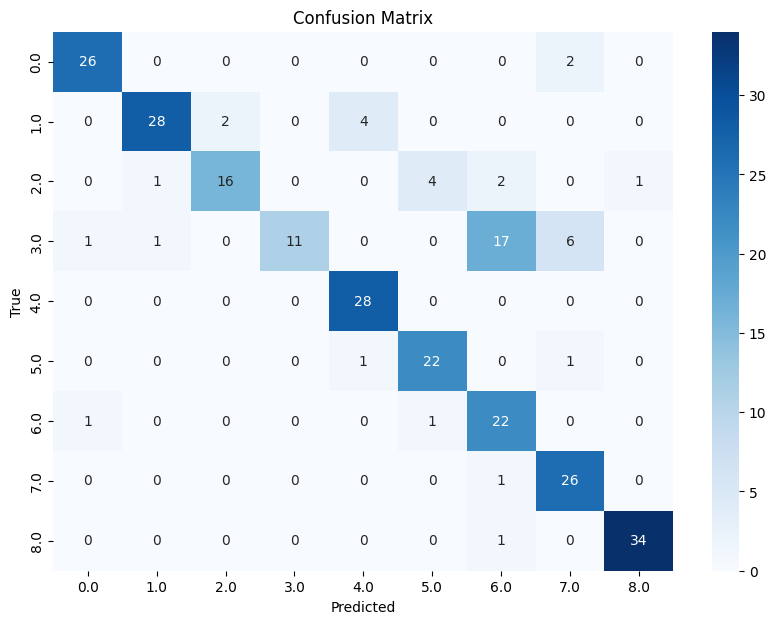

{np.float64(0.8807692307692307)}
60


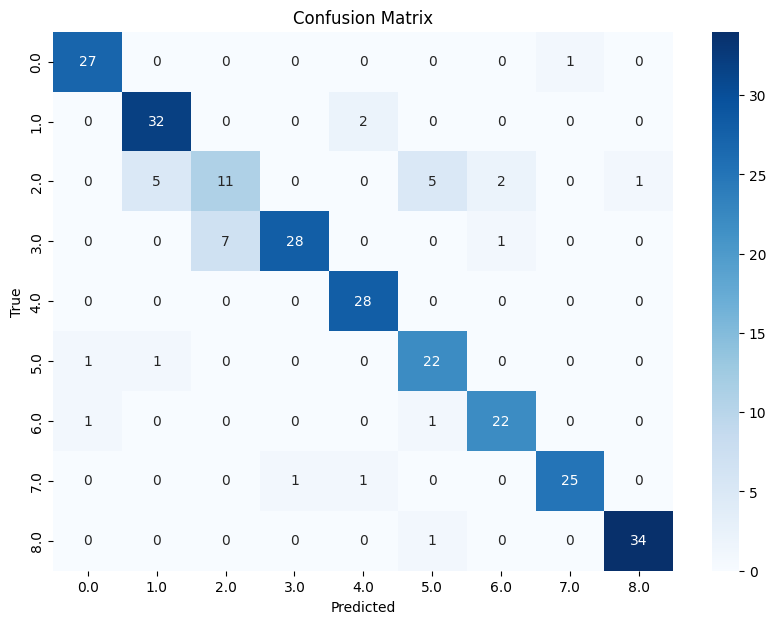

{np.float64(0.926923076923077)}
70


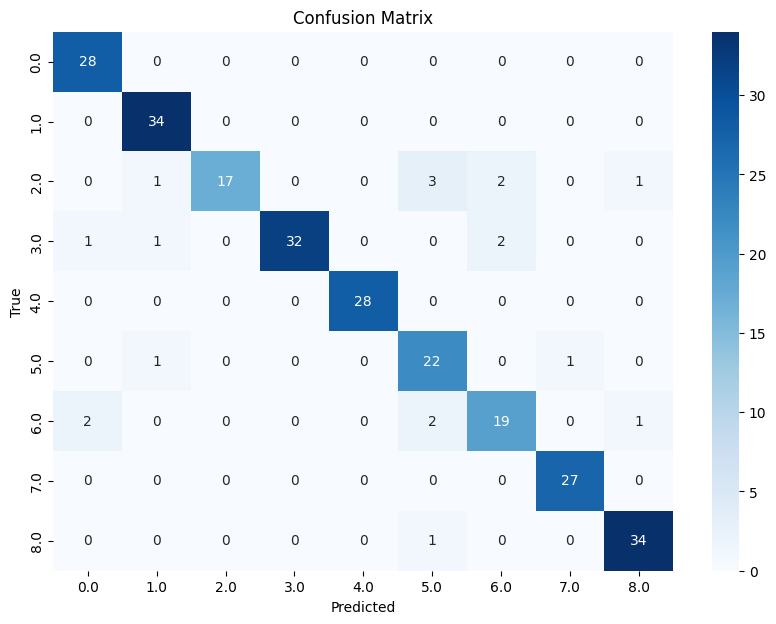

{np.float64(0.8576923076923076)}
80


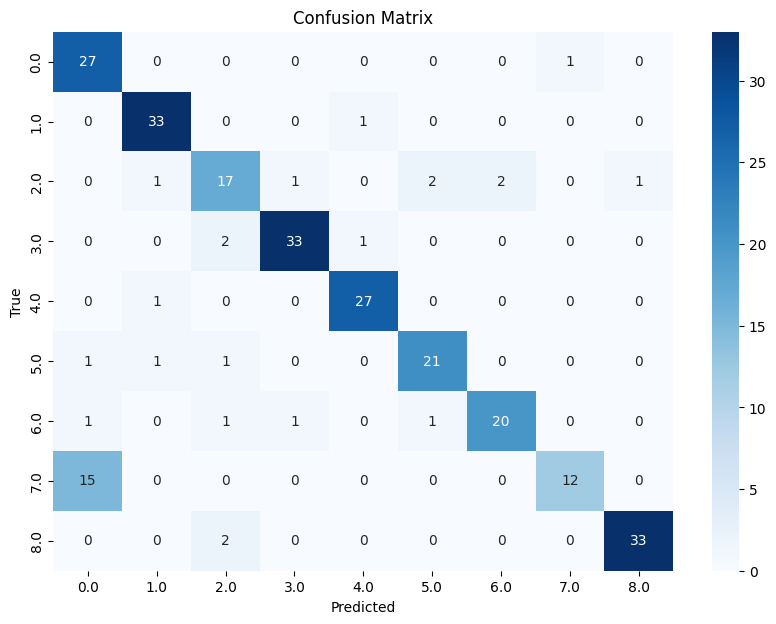

{np.float64(0.9)}
100


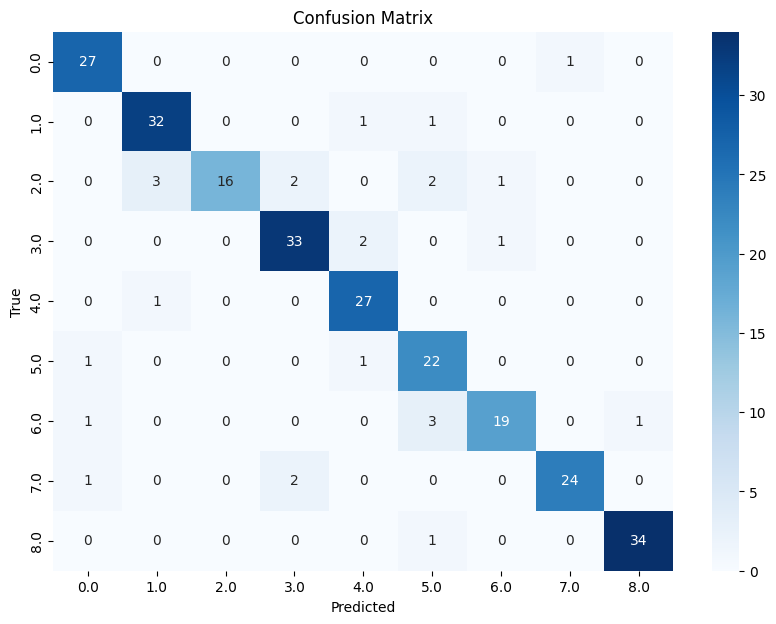

{np.float64(0.9346153846153846)}
130


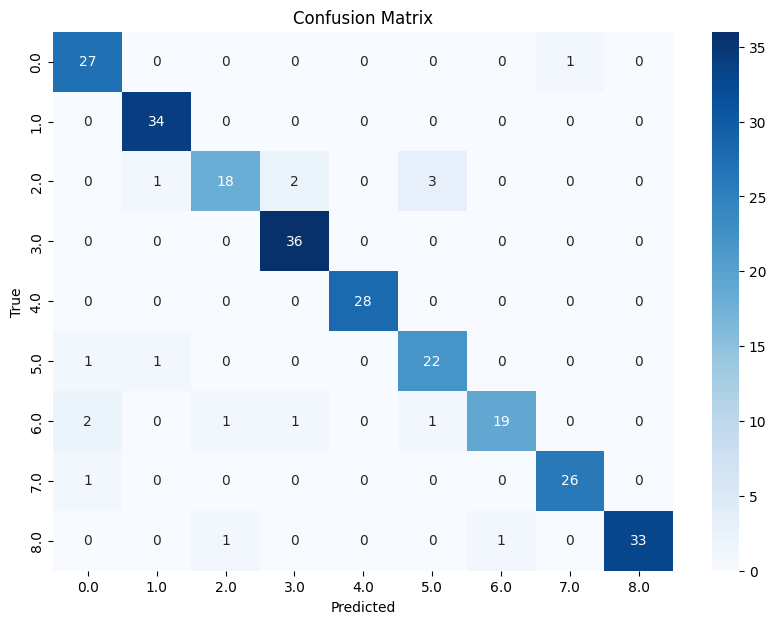

In [6]:
#same as above but for index
accs_index = []
nums_index = []

for s in dh_index_selected:
    X_train = s.iloc[:, :-1]
    y_train = s.iloc[:, -1]
    #train a random forest classifier
    rf = RandomForestClassifier(n_estimators=20, max_depth=7, random_state=42)
    rf.fit(X_train, y_train)
    #test on the test data
    y_pred = rf.predict(dh_index_test_data[:, :-1])
    #print the accuracy
    print({np.mean(y_pred == index_test_labels)})
    print(len(s))
    accs_index.append(np.mean(y_pred == index_test_labels))
    nums_index.append(len(s))

    #plot confusion matrix
    cm = confusion_matrix(index_test_labels, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [7]:
#try offline
#read the data: note there is no header
df = pd.read_csv('/Users/jonathanzhu/Documents/data/vc_mutant_data.csv', header=None)

#rename columns: all are x0, x1, x2, etc. except the last one, which is "Class"
df.columns = ['x' + str(i) for i in range(0, 512)] + ['Class']

#items in the "Class" column are currently strings - convert to integers
items = df['Class'].unique()
corresponding_dict = {items[i]: i for i in range(len(items))}

df['Class'] = df['Class'].map(corresponding_dict)
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x503,x504,x505,x506,x507,x508,x509,x510,x511,Class
0,0.052671,-0.170843,0.127665,-0.157065,0.149449,-0.405221,-0.015877,1.019597,0.306551,0.057538,...,1.002674,0.837392,1.133352,-0.255242,0.919627,-0.167685,1.559194,0.124128,0.642259,0
1,0.010678,-0.170641,0.137485,-0.158542,0.166123,-0.352311,0.006440,1.031316,0.309140,-0.023432,...,0.972432,0.887417,1.089113,-0.302200,0.849822,-0.190138,1.495022,0.091063,0.695978,0
2,0.031659,-0.180831,0.093920,-0.172080,0.157711,-0.415934,-0.031329,1.123129,0.252306,0.008820,...,1.016015,0.926723,1.136414,-0.335968,0.847125,-0.204482,1.524836,0.071172,0.737653,0
3,0.075516,-0.196257,0.198255,-0.160592,0.085160,-0.361760,-0.018122,0.951612,0.351116,0.023851,...,0.971781,0.756529,1.104958,-0.238443,0.922150,-0.206724,1.502505,0.139053,0.605317,0
4,0.040185,-0.159659,0.070033,-0.151958,0.170973,-0.406942,-0.017921,1.155567,0.306783,-0.005056,...,0.957689,0.918439,1.098478,-0.306227,0.833798,-0.207886,1.530353,0.123505,0.696751,0


0.9806949806949807
1037


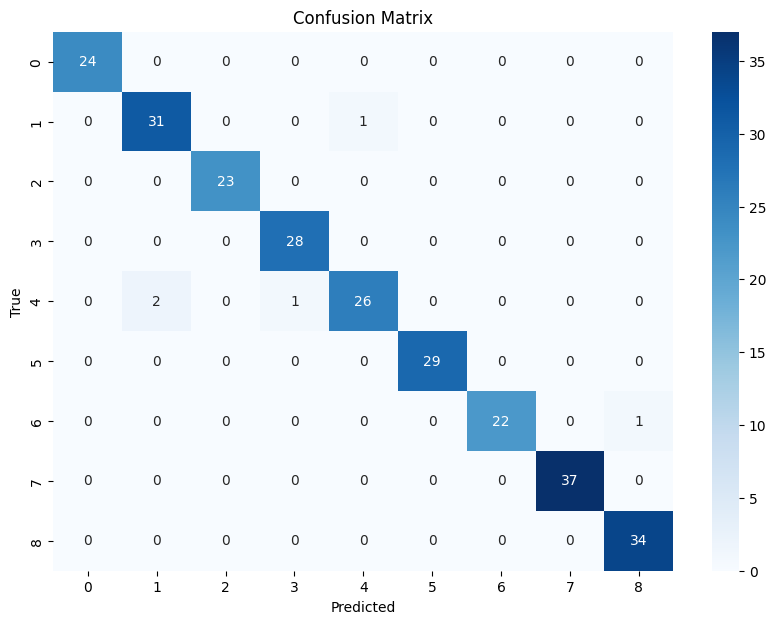

In [8]:
#split into train/test
df_train = df.sample(frac=0.8, random_state=42)
df_test = df.drop(df_train.index)

#train random forest classifier
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]
rf = RandomForestClassifier(n_estimators=20, max_depth=7, random_state=42)
rf.fit(X_train, y_train)

#test on the test data
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]
y_pred = rf.predict(X_test)

#accuracy
acc_offline = np.mean(y_pred == y_test)
print(acc_offline)
print(len(df_train))

#plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

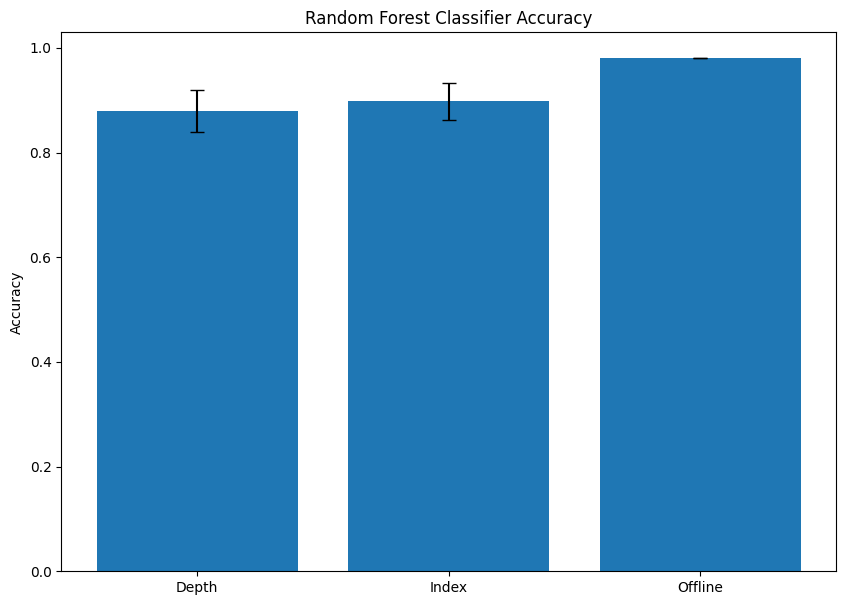

In [9]:
mean_acc_depth = np.mean(accs_depth)
std_acc_depth = np.std(accs_depth)

mean_acc_index = np.mean(accs_index)
std_acc_index = np.std(accs_index)

#plot these, together with the offline accuracy as a bar chart
plt.figure(figsize=(10, 7))
plt.bar(['Depth', 'Index', 'Offline'], [mean_acc_depth, mean_acc_index, acc_offline], yerr=[std_acc_depth, std_acc_index, 0], capsize=5)
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy')
plt.show()


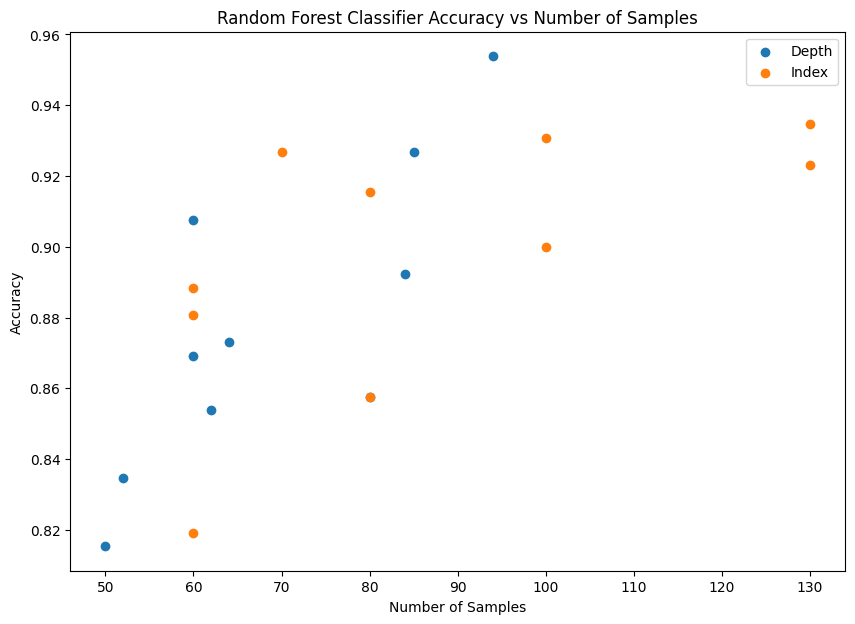

In [10]:
#plot accs_depth versus nums_depth, and accs_index versus nums_index
plt.figure(figsize=(10, 7))
plt.scatter(nums_depth, accs_depth, label='Depth')
plt.scatter(nums_index, accs_index, label='Index')
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy vs Number of Samples')
plt.legend()
plt.show()